<a href="https://colab.research.google.com/github/gadilshina-ve/SoftwareTools_DA/blob/main/PW_01/PW_01_Gadilshina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа 1. Начало работы с API

# **Вариант 16.** География разработчиков: Изучение географического распределения разработчиков.

# 1.2. GitHub API

**1.2.1.** Сгенерировать персональный токен на 7 дней на странице https://github.com/settings/tokens/new

![](https://drive.google.com/uc?export=view&id=1rNV_0jXbY4GLYAlFu-SUbOoGYWk9hKGe)





**1.2.2.**	Настройка окружения: убедитесь, что у вас установлены необходимые библиотеки: requests, pandas, matplotlib, seaborn.

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.2.3.** Подключение к GitHub API

In [ ]:
GITHUB_API_URL = "https://api.github.com"
ACCESS_TOKEN = "тут был токен"
headers = {
    "Authorization": f"token {ACCESS_TOKEN}"
}

**1.2.4.** Проанализировать собственные репозитории.

 Чтобы вывести список всех репозиториев пользователя с GitHub и отсортировать их по дате создания с помощью Python, можно воспользоваться библиотекой requests для взаимодействия с GitHub API.

In [ ]:
import requests

def get_repositories(username):
    url = f"https://api.github.com/users/{username}/repos"
    response = requests.get(url)

    if response.status_code == 200:
        repos = response.json()
        # Сортируем репозитории по дате создания
        sorted_repos = sorted(repos, key=lambda x: x['created_at'], reverse=True)
        for repo in sorted_repos:
            print(f"Repository: {repo['name']}, Created at: {repo['created_at']}")
    else:
        print(f"Error: Unable to fetch repositories for user {username} (Status code: {response.status_code})")

get_repositories('gadilshina-ve')

Repository: SoftwareTools_DA, Created at: 2024-09-14T15:03:55Z
Repository: BDP_MGPU, Created at: 2024-02-16T17:04:20Z
Repository: PDE_MGPU, Created at: 2024-02-16T16:53:00Z
Repository: PDA_SOL, Created at: 2023-09-12T18:29:56Z


**1.2.5.**	Получение данных о репозиториях. Получить информацию о репозиториях, используя определенный поисковый запрос, например, **География разработчиков**. Изучение географического распределения
разработчиков.


In [ ]:
query = "developer country"
response = requests.get(f"{GITHUB_API_URL}/search/repositories", params={"q": query}, headers=headers)
data = response.json()
repos = data['items']
repos

[{'id': 102975784,
  'node_id': 'MDEwOlJlcG9zaXRvcnkxMDI5NzU3ODQ=',
  'name': 'CountryList',
  'full_name': 'juanpablofernandez/CountryList',
  'private': False,
  'owner': {'login': 'juanpablofernandez',
   'id': 20647505,
   'node_id': 'MDQ6VXNlcjIwNjQ3NTA1',
   'avatar_url': 'https://avatars.githubusercontent.com/u/20647505?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/juanpablofernandez',
   'html_url': 'https://github.com/juanpablofernandez',
   'followers_url': 'https://api.github.com/users/juanpablofernandez/followers',
   'following_url': 'https://api.github.com/users/juanpablofernandez/following{/other_user}',
   'gists_url': 'https://api.github.com/users/juanpablofernandez/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/juanpablofernandez/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/juanpablofernandez/subscriptions',
   'organizations_url': 'https://api.github.com/users/juanpablofernandez/orgs',
   'rep

**1.2.6** Анализ данных. Извлеките и проанализируйте данные, такие как количество звезд, форков, количество открытых issues и т.д.

In [ ]:
repo_data = pd.DataFrame(repos, columns=['name', 'stargazers_count', 'forks_count', 'open_issues_count', 'size'])
print(repo_data.describe())

       stargazers_count  forks_count  open_issues_count          size
count         30.000000    30.000000          30.000000     30.000000
mean           6.566667     3.233333           1.000000   4067.866667
std            8.426900     7.238229           1.947589   9308.967407
min            0.000000     0.000000           0.000000      1.000000
25%            1.250000     0.000000           0.000000    183.250000
50%            3.000000     0.000000           0.000000    434.500000
75%           10.250000     3.750000           1.000000   2806.750000
max           38.000000    36.000000           9.000000  44830.000000


**1.2.6.** Визуализация данных: постройте графики для визуализации активности репозиториев.

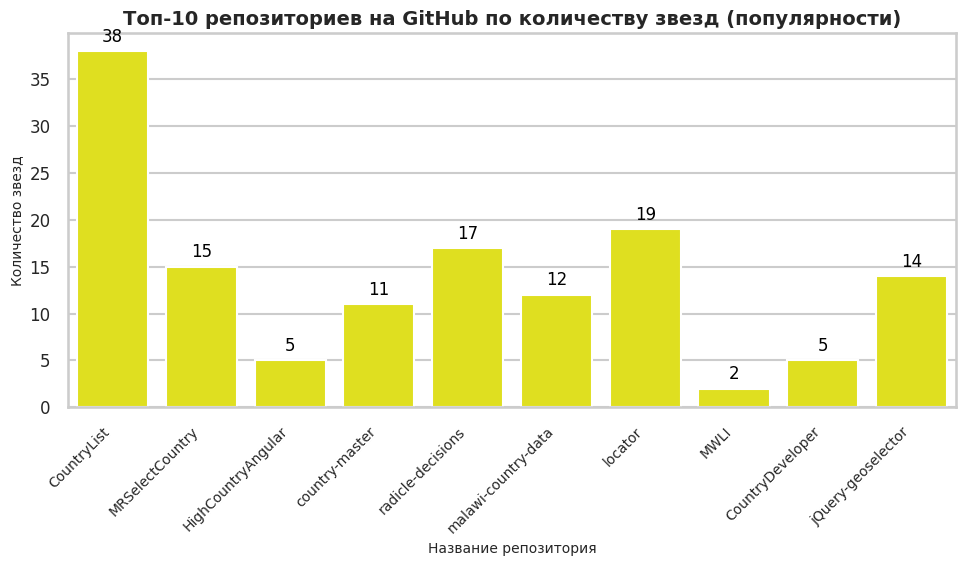

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(10, 6))

sns.barplot(x='name', y='stargazers_count', data=repo_data.head(10), color="yellow")

for index, row in repo_data.head(10).iterrows():
    plt.text(index, row['stargazers_count'] + 1, round(row['stargazers_count'], 2),
             color='black', ha="center", fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)
plt.title('Топ-10 репозиториев на GitHub по количеству звезд (популярности)', fontsize=14, fontweight='bold')
plt.xlabel('Название репозитория', fontsize=10)
plt.ylabel('Количество звезд', fontsize=10)

plt.tight_layout()
plt.show()

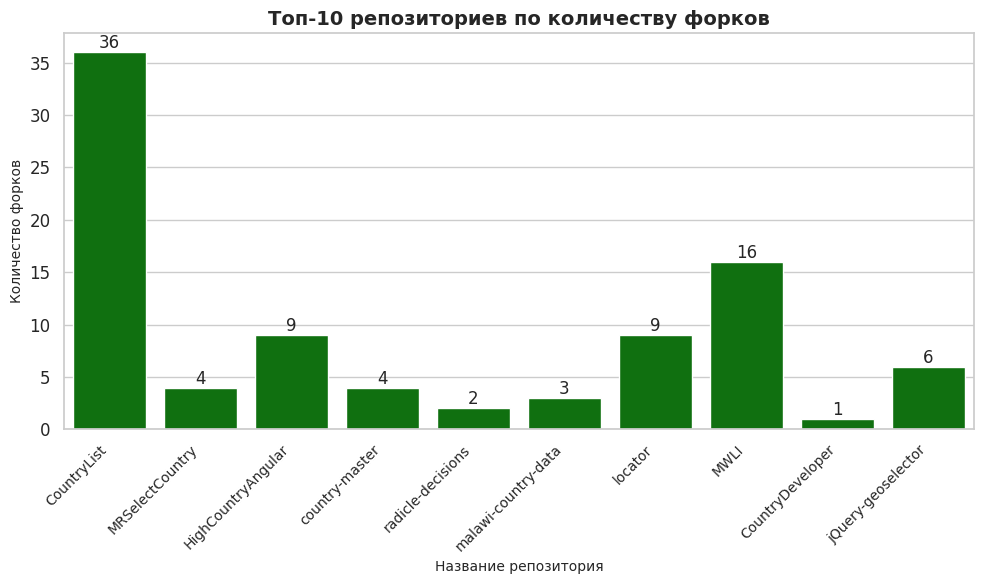

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='name', y='forks_count', data=repo_data.head(10), color="green")

for i in range(10):
    plt.text(i, repo_data['forks_count'].iloc[i], repo_data['forks_count'].iloc[i], ha='center', va='bottom')

plt.title('Топ-10 репозиториев по количеству форков', fontsize=14, fontweight='bold')
plt.xlabel('Название репозитория', fontsize=10)
plt.ylabel('Количество форков', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

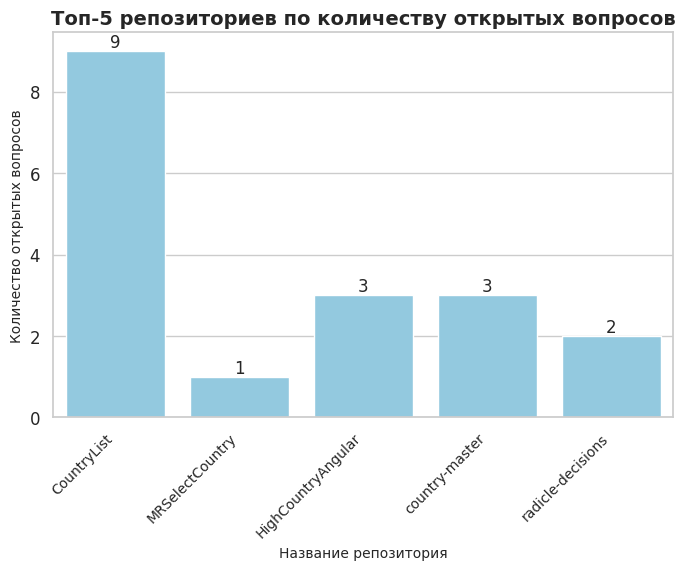

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x='name', y='open_issues_count', data=repo_data.head(5), color="skyblue")

for i in range(5):
    plt.text(i, repo_data['open_issues_count'].iloc[i], repo_data['open_issues_count'].iloc[i], ha='center', va='bottom')

plt.title('Топ-5 репозиториев по количеству открытых вопросов', fontsize=14, fontweight='bold')
plt.xlabel('Название репозитория', fontsize=10)
plt.ylabel('Количество открытых вопросов', fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=12)

plt.show()

**1.2.7.** Анализ активности пользователей. Проанализируйте активность пользователей, например, по количеству коммитов или участия в pull requests. Для этого можно получить данные о коммитах или pull requests для каждого репозитория.

In [ ]:
repo_name = repos[0]['full_name']
commit_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/commits", headers=headers)
commits = commit_response.json()
print(f"Количество коммитов в репозитории {repo_name}: {len(commits)}")

Количество коммитов в репозитории juanpablofernandez/CountryList: 9


In [ ]:
repo_name = 'CountryDeveloper'
commit_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/commits", headers=headers)
commits = commit_response.json()
print(f"Количество коммитов в репозитории {repo_name}: {len(commits)}")

Количество коммитов в репозитории CountryDeveloper: 3


In [ ]:
repo_name = repos[0]['full_name']

open_pr_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/pulls?state=open", headers=headers)
open_prs = open_pr_response.json()
num_open_prs = len(open_prs)
print(f"Количество открытых pull requests в репозитории {repo_name}: {num_open_prs}")

closed_pr_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/pulls?state=closed", headers=headers)
closed_prs = closed_pr_response.json()
num_closed_prs = len(closed_prs)
print(f"Количество зактрытых pull requests в репозитории {repo_name}: {num_closed_prs}")

Количество открытых pull requests в репозитории juanpablofernandez/CountryList: 3
Количество зактрытых pull requests в репозитории juanpablofernandez/CountryList: 1


In [ ]:
repo_name = 'CountryDeveloper'

open_pr_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/pulls?state=open", headers=headers)
open_prs = open_pr_response.json()
num_open_prs = len(open_prs)
print(f"Количество открытых pull requests в репозитории {repo_name}: {num_open_prs}")

closed_pr_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/pulls?state=closed", headers=headers)
closed_prs = closed_pr_response.json()
num_closed_prs = len(closed_prs)
print(f"Количество зактрытых pull requests в репозитории {repo_name}: {num_closed_prs}")

Количество открытых pull requests в репозитории CountryDeveloper: 3
Количество зактрытых pull requests в репозитории CountryDeveloper: 3


В конце выполнения задания **я удалила токен.**